In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'watermelon_4_0.txt'
os.path.exists(path)

True

In [10]:
dataSet = []
with open("watermelon_4_0.txt", 'r') as f:
    for row in f:
        tmp = list(map(float, row.split(' ')))
        dataSet.append(tmp)

In [84]:
x = np.array(dataSet).T
print(x)

[[0.697 0.774 0.634 0.608 0.556 0.403 0.481 0.437 0.666 0.243 0.245 0.343
  0.639 0.657 0.36  0.593 0.719 0.359 0.339 0.282 0.748 0.714 0.483 0.478
  0.525 0.751 0.532 0.473 0.725 0.446]
 [0.46  0.376 0.264 0.318 0.215 0.237 0.149 0.211 0.091 0.267 0.057 0.099
  0.161 0.198 0.37  0.042 0.103 0.188 0.241 0.257 0.232 0.346 0.312 0.437
  0.369 0.489 0.472 0.376 0.445 0.459]]


In [112]:
sigma = np.array([[0.1, 0],[0,0.1]])
a_list = [1/3,1/3,1/3]
mu_list=[x[:,5], x[:,21], x[:,26]]
print(mu_list)
sigma_list = [sigma.copy(), sigma.copy(), sigma.copy()]

[array([0.403, 0.237]), array([0.714, 0.346]), array([0.532, 0.472])]


In [98]:
def pdf(x, mu, sigma, n):
    coefficient = 1/(pow(2*np.pi, n/2) * np.sqrt(np.linalg.det(sigma)))
    x_mu = x - mu
    tmp = np.dot(x_mu.T, np.linalg.inv(sigma))
    tmp = -0.5 * np.dot(tmp, x_mu)
    return coefficient * np.exp(tmp)

In [110]:
def PM(x, a_list, mu_list, sigma_list):
    ret = []
     for a, mu, sigma in zip(a_list, mu_list, sigma_list):
        mu = mu.reshape(x.shape[0],1)
        denominator += a * pdf(x, mu, sigma, 2)
    for i in range(len(a_list)):
        a, mu, sigma = a_list[i], mu_list[i], sigma_list[i]
        mu = mu.reshape(x.shape[0],1)
        molecular = a * pdf(x, mu, sigma, 2)
        denominator = 0
       
        pmi = molecular / denominator
        ret.append(pmi)
    return ret

In [113]:
PM(x[:,0].reshape(2,1), a_list, mu_list, sigma_list)

[array([[0.2187515]]), array([[0.40437245]]), array([[0.37687605]])]

In [82]:
s = 0
xx = []
yy = []
for i in range(5000, 10001):
    v = (i - 10000)/1000
    xx.append(v)
    y1 = pdf(np.mat(v), np.mat(0), np.mat(1), 1)
    y = float(y1)
    
    yy.append(y)
    s += y * 0.001
print(s)


0.5001991852313689


In [78]:
normfun(0,0,1)

0.3989422804014327

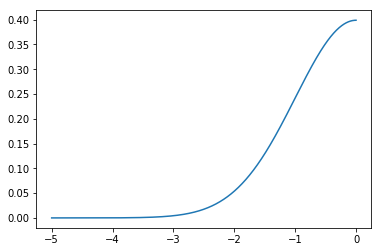

In [79]:
plt.plot(xx,yy)

In [57]:
from scipy.stats import norm

0.3520653267642995